In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("C:\\Users\\thinkpad\\Desktop\\project\\final_data.csv")

In [2]:
df.shape

(12584, 6)

In [3]:
df.isnull().sum()

title      1239
date          0
rating        0
text          9
product       0
company       0
dtype: int64

In [4]:
df1 = df.dropna(subset=['text'])
df1.isnull().sum()

title      1232
date          0
rating        0
text          0
product       0
company       0
dtype: int64

In [5]:
df1.dtypes

title      object
date       object
rating      int64
text       object
product    object
company    object
dtype: object

In [14]:
df1['date'] = df1['date'].replace('Purchaser','')
df1['date'] = df1['date'].replace('review','')
df1['company'] = df1['company'].replace('Samsung','SAMSUNG')

In [15]:
df1['title'] = df1['title'].fillna(' ').apply(str)
df1['text'] = df1['text'].fillna(' ').apply(str)
df1['date'] = pd.to_datetime(df1['date'])
df1['company'] = df1['company'].astype('category')

In [16]:
df1.dtypes

title              object
date       datetime64[ns]
rating              int64
text               object
product            object
company          category
dtype: object

In [9]:
df1.isnull().sum()

title         0
date       1144
rating        0
text          0
product       0
company       0
dtype: int64

In [19]:
df1['rating'].value_counts()

5    7616
1    2296
4    1440
3     618
2     605
Name: rating, dtype: int64

In [18]:
df1['company'].value_counts()

SAMSUNG    2793
TCL        2530
LG         2420
VIZIO      2417
Hisense    2415
Name: company, dtype: int64

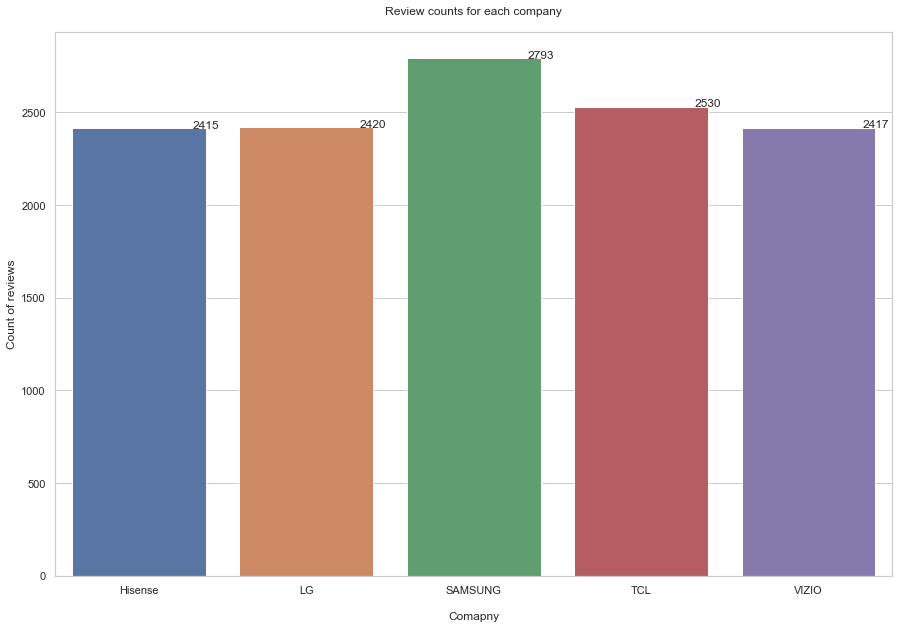

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
total = float(len(df1))
ax = sns.countplot(data = df1, x='company')

plt.title("Review counts for each company\n")
plt.ylabel("Count of reviews")
plt.xlabel("\nComapny")

for p in (ax.patches):
    cnt = p.get_height()
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(cnt,(x,y),ha='center')

plt.show()

In [13]:
from powerbiclient import Report, models

In [14]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [15]:
device_auth = DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FC898PWEY to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [17]:
group_id = "2df6be52-b70c-488d-928d-6dfda42d66a5"
report_id = "298f5c06-670e-4a3a-b1f7-cf66a68c8a32"

In [18]:
report = Report(group_id = group_id, report_id = report_id, auth = device_auth)
report

Report()

## Tokenization

In [12]:
#firstly converting in tokens and removing punctuations


import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
def tok_pun(text):
    tokenized_words = word_tokenize(text)
    new_words= [i.lower() for i in tokenized_words if i.isalnum()]
    return new_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
sentence  = "Hello Mr. vip! i Smith, how are you doing today flying stopped plane ❤️?"
after_tok_pun = tok_pun(sentence)
after_tok_pun

['hello',
 'vip',
 'i',
 'smith',
 'how',
 'are',
 'you',
 'doing',
 'today',
 'flying',
 'stopped',
 'plane']

## Stopwords

In [14]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'your', 'haven', 'hadn', 'while', 'theirs', 'do', 'herself', 'o', "didn't", 'yourselves', 'which', 'own', 'other', 'when', 'and', 'they', 'did', 'a', 'shouldn', 'yours', 'there', 'each', 'further', "mightn't", 'whom', 'have', 'very', "couldn't", 'if', 'is', "hadn't", 'd', 'their', 'aren', 'any', 'am', 'both', 'been', 'into', 'more', 'mustn', 'after', "wouldn't", 'again', 'up', 'against', "haven't", 'her', 'but', 'above', 'will', 'couldn', 'in', 'few', 'them', 'during', 'its', 'down', 'so', "wasn't", 'has', 'where', 'our', 'no', "isn't", 'had', 'we', 'about', "don't", 'those', 'an', 'ours', 'same', 'to', 'myself', 'y', 'out', 're', 'then', "you're", 'the', 'were', "mustn't", 'doing', "shan't", 'what', 'his', 've', 'should', "that'll", 'my', "you'd", 'all', "you've", 'of', 'once', 'at', 'itself', 'are', 'how', 'some', 'under', 'before', 'here', 'be', 'because', 'isn', 'this', 'needn', 'didn', "she's", 'with', 'ma', 'it', 'don', 'from', 'having', 'between', 'being', 'she', "should've", '

In [15]:
#secondly removing stop words

def stop_word_remove(text):
    filtered_sent=[]
    for w in text:
        if w not in stop_words:
            filtered_sent.append(w)
    return filtered_sent

In [16]:
after_stop = stop_word_remove(after_tok_pun)
after_stop

['hello', 'vip', 'smith', 'today', 'flying', 'stopped', 'plane']

## POS Tagging

In [17]:
#thirdly converting in POS format


#nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
def pos_tag_word(text):
    pos_tagged_word = pos_tag(text)
    return pos_tagged_word

In [18]:
after_pos_tag = pos_tag_word(after_stop)
after_pos_tag

[('hello', 'NN'),
 ('vip', 'NN'),
 ('smith', 'NN'),
 ('today', 'NN'),
 ('flying', 'VBG'),
 ('stopped', 'VBD'),
 ('plane', 'NN')]

## Lemmatization

In [19]:
#therefter doing lemmatization with using POS tagging


#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
def lem_words(text):
    lemmatized_output = []
    for word, tag in text:
        if tag.startswith("NN"):
            lemmatized_output.append(lem.lemmatize(word, pos='n'))
        elif tag.startswith('VB'):
            lemmatized_output.append(lem.lemmatize(word, pos='v'))
        elif tag.startswith('JJ'):
            lemmatized_output.append(lem.lemmatize(word, pos='a'))
        else:
            lemmatized_output.append(lem.lemmatize(word))
    #lemmatized_output = ' '.join([lem.lemmatize(w) for w in text])
    final_string = ' '.join([i for i in lemmatized_output])
    return final_string

In [20]:
after_lem_word = lem_words(after_pos_tag)
after_lem_word

'hello vip smith today fly stop plane'

In [21]:
def full_data_clean(text):
    tokenized_words = word_tokenize(text)
    new_words= [i.lower() for i in tokenized_words if i.isalnum()]
    
    filtered_sent=[]
    for w in new_words:
        if w not in stop_words:
            filtered_sent.append(w)
    
    pos_tagged_word = pos_tag(filtered_sent)
    
    lemmatized_output = []
    for word, tag in pos_tagged_word:
        if tag.startswith("NN"):
            lemmatized_output.append(lem.lemmatize(word, pos='n'))
        elif tag.startswith('VB'):
            lemmatized_output.append(lem.lemmatize(word, pos='v'))
        elif tag.startswith('JJ'):
            lemmatized_output.append(lem.lemmatize(word, pos='a'))
        else:
            lemmatized_output.append(lem.lemmatize(word))
    #lemmatized_output = ' '.join([lem.lemmatize(w) for w in text])
    final_string = ' '.join([i for i in lemmatized_output])
    return final_string

In [22]:
df1['cleaned_text'] = df1['text'].apply(full_data_clean)

In [23]:
df1.head()

,title,date,rating,text,product,company,cleaned_text
0,Great TV for cord cutting,NaT,5,after trying several budget tv's that all had ...,"SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,try several budget tv panel defect decide spen...
1,Frustrating,NaT,1,"i've owned the tv for a little over 6 months, ...","SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,own tv little 6 month mount soon arrive never ...
2,"1000 hours in, I give it an A+",2021-05-06,5,"After approximately 100 hours of use, here ar...","SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,approximately 100 hour use current thought reg...
3,Picture Perfect,2021-04-14,5,I know that this isn't even the top of the li...,"SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,know even top line samsung could dream high qu...
4,Amazing Versatile TV!,2021-05-18,5,My husband and I absolutely love this TV. Th...,"SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,husband absolutely love tv hdr amaze range dep...


In [24]:
df1['cleaned_title'] = df1['title'].apply(full_data_clean)

In [25]:
df1.head()

,title,date,rating,text,product,company,cleaned_text,cleaned_title
0,Great TV for cord cutting,NaT,5,after trying several budget tv's that all had ...,"SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,try several budget tv panel defect decide spen...,great tv cord cutting
1,Frustrating,NaT,1,"i've owned the tv for a little over 6 months, ...","SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,own tv little 6 month mount soon arrive never ...,frustrate
2,"1000 hours in, I give it an A+",2021-05-06,5,"After approximately 100 hours of use, here ar...","SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,approximately 100 hour use current thought reg...,1000 hour give
3,Picture Perfect,2021-04-14,5,I know that this isn't even the top of the li...,"SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,know even top line samsung could dream high qu...,picture perfect
4,Amazing Versatile TV!,2021-05-18,5,My husband and I absolutely love this TV. Th...,"SAMSUNG 65"" Class Neo QLED 4K (2160P) LED Smar...",SAMSUNG,husband absolutely love tv hdr amaze range dep...,amaze versatile tv


In [26]:
df1.to_csv('cleaned_data.csv')